Importing all necessary libraries and declaring all functions below

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussElim(A,b):
    """
    Routine to solve problem Ax = b using gauss elim.
    A is an NxN matrix, b a column vector of size N
    returns x vector of dimentsion N
    """
    # setup our augmented matrix by copying A and b
    N = A.shape[0]
    augmat = np.zeros((N, N+1))
    augmat[:,:N] = np.copy(A)
    augmat[:,N] = np.copy(b)
    
    for pivot in range(0,N):
        refrow = pivot
        for row in range(refrow+1, N):
            ratio =  augmat[row,refrow]/augmat[refrow,refrow]
            for col in range(refrow, N+1):
                augmat[row,col] = augmat[row,col] - augmat[refrow,col]*ratio
    #print(augmat)
    x = np.zeros(N)
    for row in range(N-1,-1,-1):
        x[row] = augmat[row,N] 
        for col in range(row+1, N):
            x[row] -= augmat[row,col]*x[col] 
        x[row] = x[row]/augmat[row,row]       
    return x

def lagrangePoly(myx,x,y):
  result = 0
  for i in range(len(x)):
    for j in range(len(x)):
      partResult = 1
      if (j-1)**2 <1:
        pass
      else:
        partResult *= (x-x[j])/(x[i]-x[j])
    result = partResult*y[i]
  return result

def lerp(xi,x0,y0,x1,y1):
  result = y0 +(xi-x0)*(y1-y0)/(x1-x0)
  return result

# Interpolation

##Langrange Interpolation of Polynomials

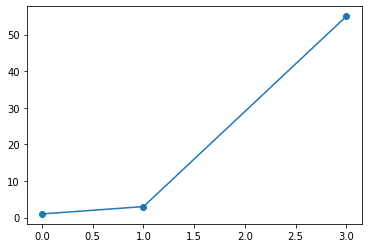

In [ ]:
x = np.array([0,1,3])
y = np.array([1,3,55])
plt.scatter(x,y)
plt.plot(x,y)

In [ ]:
output = lerp(0.5,x[0],y[0],x[1],y[1])
output

2.0

In [ ]:
modelx = np.linspace(x[0],x[2])

## Quadratic Interpolation

In [ ]:
A = np.zeros((3,3))
for i in range(3):
  A[i,0] = 1
  A[i,1] = x[i]
  A[i,2] = x[i]**2

A

array([[1., 0., 0.],
       [1., 1., 1.],
       [1., 3., 9.]])

In [ ]:
B = np.array([1,3,55])
gaussA = gaussElim(A,B)
gaussA

array([ 1., -6.,  8.])

In [ ]:
modely = np.zeros(len(modelx))
gaussA[0]

1.0

In [ ]:


for i in range(len(modely)):
  modely[i] = gaussA[0] + gaussA[1]*modelx[i] + gaussA[2]*(modelx[i]**2)

modely

array([ 1.00000000e+00,  6.62640566e-01,  3.85256143e-01,  1.67846731e-01,
        1.04123282e-02, -8.70470637e-02, -1.24531445e-01, -1.02040816e-01,
       -1.95751770e-02,  1.22865473e-01,  3.25281133e-01,  5.87671803e-01,
        9.10037484e-01,  1.29237818e+00,  1.73469388e+00,  2.23698459e+00,
        2.79925031e+00,  3.42149105e+00,  4.10370679e+00,  4.84589754e+00,
        5.64806331e+00,  6.51020408e+00,  7.43231987e+00,  8.41441066e+00,
        9.45647647e+00,  1.05585173e+01,  1.17205331e+01,  1.29425239e+01,
        1.42244898e+01,  1.55664307e+01,  1.69683465e+01,  1.84302374e+01,
        1.99521033e+01,  2.15339442e+01,  2.31757601e+01,  2.48775510e+01,
        2.66393170e+01,  2.84610579e+01,  3.03427738e+01,  3.22844648e+01,
        3.42861308e+01,  3.63477718e+01,  3.84693878e+01,  4.06509788e+01,
        4.28925448e+01,  4.51940858e+01,  4.75556018e+01,  4.99770929e+01,
        5.24585589e+01,  5.50000000e+01])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


ValueError: ignored

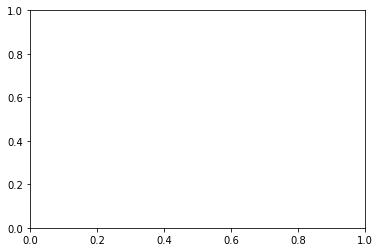

In [ ]:
plt.plot(modelx, lagrangePoly(modelx,x,y))
plt.plot(modelx,modely)